# 03: Exploratory Data Analysis
---

The focus for the EDA will be to identify a top threat storm event that can be most reliably forecasted.

## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import collections

pd.set_option('display.max_columns', None)

---
## 2. Loading Data

In [2]:
all_storms = pd.read_csv('../data/all_storms_dt_damage_clean.csv')

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
all_storms

,state,region,year,event_type,begin_date_time,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,magnitude,magnitude_type,tor_f_scale,tor_length,tor_width
0,Oklahoma,South,1950,Tornado,1950-04-28 14:45:00,1950-04-28 14:45:00,0,0,0,0,250000,0,0.0,NaN,F3,3.4,400.0
1,Texas,South,1950,Tornado,1950-06-19 20:40:00,1950-06-19 20:40:00,0,0,0,0,0,0,0.0,NaN,F0,15.8,167.0
2,Indiana,Midwest,1950,Tornado,1950-07-19 14:30:00,1950-07-19 14:30:00,0,0,0,0,25000,0,0.0,NaN,F1,4.3,200.0
3,Indiana,Midwest,1950,Tornado,1950-07-19 17:45:00,1950-07-19 17:45:00,0,0,0,0,0,0,0.0,NaN,F2,1.1,100.0
4,Colorado,West,1950,Tornado,1950-07-22 15:07:00,1950-07-22 15:07:00,0,0,0,0,0,0,0.0,NaN,NaN,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740591,Arkansas,South,2022,Winter Storm,2022-02-02 18:45:00,2022-02-04 09:15:00,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1740592,Arkansas,South,2022,Winter Weather,2022-02-03 02:50:00,2022-02-03 10:15:00,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1740593,Arkansas,South,2022,Winter Storm,2022-02-03 01:00:00,2022-02-03 19:45:00,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1740594,Massachusetts,Northeast,2022,Heavy Snow,2022-02-25 00:00:00,2022-02-25 16:00:00,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
all_storms.dtypes

state                 object
region                object
year                   int64
event_type            object
begin_date_time       object
end_date_time         object
injuries_direct        int64
injuries_indirect      int64
deaths_direct          int64
deaths_indirect        int64
damage_property        int64
damage_crops           int64
magnitude            float64
magnitude_type        object
tor_f_scale           object
tor_length           float64
tor_width            float64
dtype: object

---
## 3. High-Level Exploration

### 3.1. Quick visuals

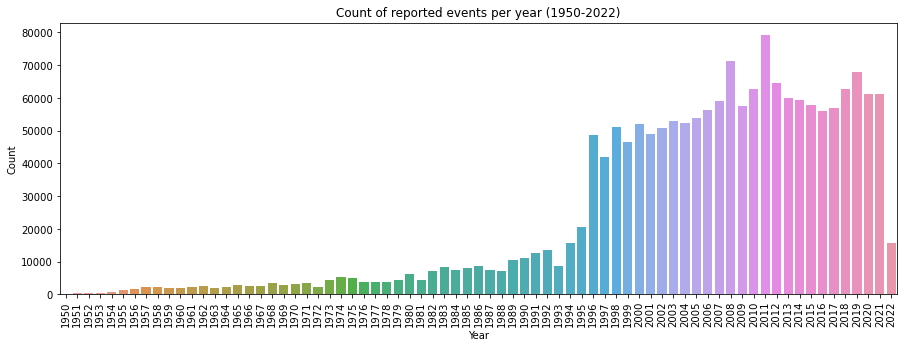

In [5]:
# Count of reported events per year (1950-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = all_storms, x = 'year')
plt.title('Count of reported events per year (1950-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90);

Of the 1,740,596 events, the vast majority occur after 1995. Between 1950 and 1995, there was a steady increase up toward 20,000 events, but in 1996, we see a sudden spike with over 50,000 events recorded. From there, events increased toward 60,000, though 2008 and 2011 are seen to surpass that and reach 70,000 and 80,000, respectively.

According to the National Climatic Data Center, the storm events database was moved online in 1996. They've also stated that the number of events dramatically increased due to advances in technology and population density in previously sparse areas, so that would explain the sudden spike. 

In [6]:
# Number of unique event types

all_storms['event_type'].nunique()

70

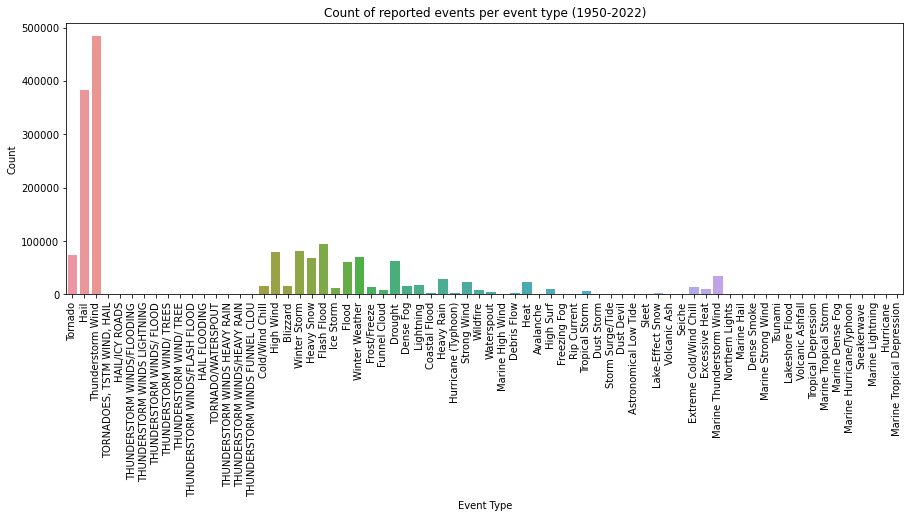

In [7]:
# Count of reported events per event type (1950-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = all_storms, x = 'event_type')
plt.title('Count of reported events per event type (1950-2022)')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [8]:
# event type value counts

all_storms['event_type'].value_counts().head(10)

Thunderstorm Wind    484908
Hail                 382234
Flash Flood           93748
Winter Storm          81430
High Wind             79894
Tornado               73987
Winter Weather        70719
Heavy Snow            67560
Drought               63322
Flood                 61005
Name: event_type, dtype: int64

In [9]:
print('Thunderstorm Wind: ' + str(484_908 / 1_740_596))
print('Hail: ' + str(382_234 / 1_740_596))

Thunderstorm Wind: 0.27858733445325623
Hail: 0.2195994935068218


There are 70 event types recorded in the dataset, but it's the thunderstorm wind and hail events that account for half of the data. They make up 28% and 22% of the data, respectively.

This makes sense as thunderstorm wind and hail events were among the first to be recorded by the Storm Prediction Center in 1955. They're also more common than many of the other events. Most of the other events are more severe and require special conditions in order to occur, so aside from the fact their recordings didn't begin until 1993 under the National Climatic Data Center, it makes sense that they have far less occurrences. 

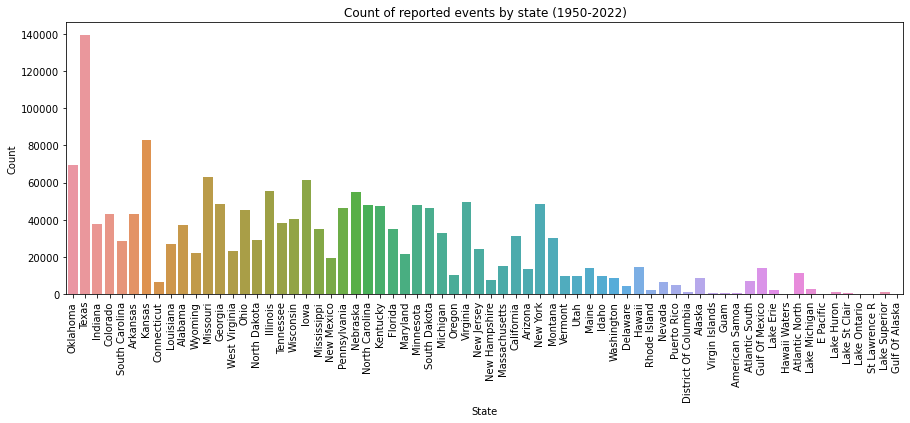

In [10]:
# Count of reported events by state (1950-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = all_storms, x = 'state')
plt.title('Count of reported events by state (1950-2022)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90);

The state column appears to have more than just states recorded. U.S. territories and bodies of water are also included. Among the states, Texas has the highest event count with nearly 140,000 events recorded and Kansas has the second-highest with about 80,000. Most states are in the 20,000-60,000 range and those below 20,000 are either smaller states or have a sparse population density. As for the territories and bodies of water, none of them exceed 20,000 events.

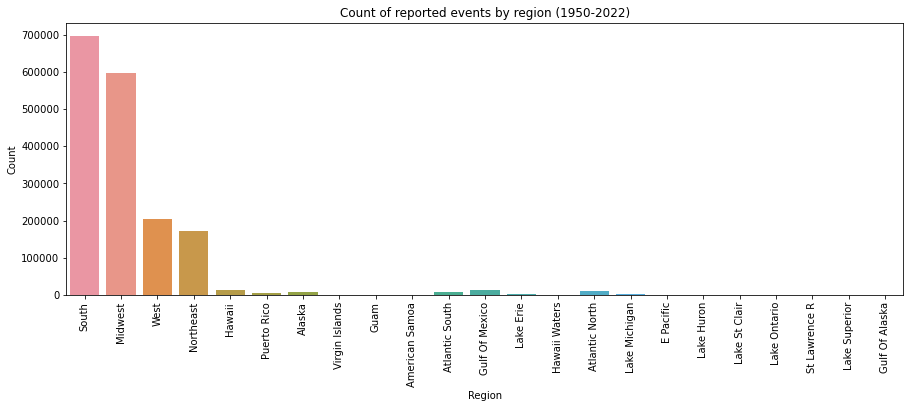

In [11]:
# Count of reported events by region (1950-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = all_storms, x = 'region')
plt.title('Count of reported events by region (1950-2022)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90);

Given that the count of storm events varied greatly between the states, I wanted to see what they would look like on a regional level.

The South has the highest event count with nearly 700,000 events recorded. In second is the Midwest with close to 600,000, followed by the West with about 200,000 and lastly the Northeast with just under 200,000.

### 3.2. Event types for which magnitude is tracked

According to the data dictionary, magnitude is only used for wind speeds (knots) and hail size (inches to the hundredth). Given that not all event types track magnitude, it'll be helpful to see what events I have to work with.

In [12]:
mag_no_null = all_storms[all_storms['magnitude'].notnull()]

In [13]:
mag_no_null['event_type'].unique()

array(['Tornado', 'Hail', 'Thunderstorm Wind',
       'TORNADOES, TSTM WIND, HAIL', 'HAIL/ICY ROADS',
       'THUNDERSTORM WINDS/FLOODING', 'THUNDERSTORM WINDS LIGHTNING',
       'THUNDERSTORM WINDS/ FLOOD', 'THUNDERSTORM WIND/ TREES',
       'THUNDERSTORM WIND/ TREE', 'THUNDERSTORM WINDS/FLASH FLOOD',
       'HAIL FLOODING', 'TORNADO/WATERSPOUT',
       'THUNDERSTORM WINDS HEAVY RAIN', 'THUNDERSTORM WINDS/HEAVY RAIN',
       'THUNDERSTORM WINDS FUNNEL CLOU', 'High Wind',
       'Hurricane (Typhoon)', 'Strong Wind', 'Blizzard', 'Winter Storm',
       'Heavy Snow', 'Lightning', 'Funnel Cloud', 'Heavy Rain',
       'Tropical Storm', 'Storm Surge/Tide', 'Waterspout', 'Wildfire',
       'Dust Storm', 'Flash Flood', 'Flood', 'Seiche', 'Marine High Wind',
       'Dust Devil', 'Marine Thunderstorm Wind', 'Marine Hail',
       'Marine Strong Wind'], dtype=object)

#### **Magnitude Summary**

Tornado, hail and thunderstorm wind events are the standouts from this list. Because they've all been tracked since the 1950s, I'll have a better chance at long-term trends here than with any other events. Hail and thunderstorm wind also have the highest event counts, so I know there'll be a lot of data to work with there.

### 3.3. Event types by total event counts and casualties (injuries, deaths and damage)

The purpose of this will be to get a closer look at the sum of the direct and indirect injuries, direct and indirect deaths, and damage to property and crops by event type. This will provide another perspective and allow me to further narrow down what events to look into, not because these columns will be used as variables in the time series analysis, but because I'd like to choose an event whose casualties have proven to be a top threat.

In [14]:
# Creating a list of all event types

event_type_list = all_storms['event_type'].unique().tolist()

In [15]:
# Sorting the list in alphabetical order

event_type_list.sort()

In [16]:
event_type_list

['Astronomical Low Tide',
 'Avalanche',
 'Blizzard',
 'Coastal Flood',
 'Cold/Wind Chill',
 'Debris Flow',
 'Dense Fog',
 'Dense Smoke',
 'Drought',
 'Dust Devil',
 'Dust Storm',
 'Excessive Heat',
 'Extreme Cold/Wind Chill',
 'Flash Flood',
 'Flood',
 'Freezing Fog',
 'Frost/Freeze',
 'Funnel Cloud',
 'HAIL FLOODING',
 'HAIL/ICY ROADS',
 'Hail',
 'Heat',
 'Heavy Rain',
 'Heavy Snow',
 'High Surf',
 'High Wind',
 'Hurricane',
 'Hurricane (Typhoon)',
 'Ice Storm',
 'Lake-Effect Snow',
 'Lakeshore Flood',
 'Lightning',
 'Marine Dense Fog',
 'Marine Hail',
 'Marine High Wind',
 'Marine Hurricane/Typhoon',
 'Marine Lightning',
 'Marine Strong Wind',
 'Marine Thunderstorm Wind',
 'Marine Tropical Depression',
 'Marine Tropical Storm',
 'Northern Lights',
 'Rip Current',
 'Seiche',
 'Sleet',
 'Sneakerwave',
 'Storm Surge/Tide',
 'Strong Wind',
 'THUNDERSTORM WIND/ TREE',
 'THUNDERSTORM WIND/ TREES',
 'THUNDERSTORM WINDS FUNNEL CLOU',
 'THUNDERSTORM WINDS HEAVY RAIN',
 'THUNDERSTORM WINDS LIG

In [17]:
# Creating a dictionary with all event types and their counts

event_count_dict = all_storms['event_type'].value_counts().to_dict()

In [18]:
# Sorting the dictionary by key in alphabetical order

event_count_dict_sorted = collections.OrderedDict(sorted(event_count_dict.items()))

In [19]:
event_count_dict_sorted

OrderedDict([('Astronomical Low Tide', 614),
             ('Avalanche', 728),
             ('Blizzard', 15073),
             ('Coastal Flood', 3576),
             ('Cold/Wind Chill', 15586),
             ('Debris Flow', 1845),
             ('Dense Fog', 15048),
             ('Dense Smoke', 98),
             ('Drought', 63322),
             ('Dust Devil', 234),
             ('Dust Storm', 1339),
             ('Excessive Heat', 10431),
             ('Extreme Cold/Wind Chill', 14193),
             ('Flash Flood', 93748),
             ('Flood', 61005),
             ('Freezing Fog', 435),
             ('Frost/Freeze', 13637),
             ('Funnel Cloud', 9070),
             ('HAIL FLOODING', 1),
             ('HAIL/ICY ROADS', 1),
             ('Hail', 382234),
             ('Heat', 23522),
             ('Heavy Rain', 28136),
             ('Heavy Snow', 67560),
             ('High Surf', 10101),
             ('High Wind', 79894),
             ('Hurricane', 235),
             ('Hurricane (T

In [20]:
# Extracting the values from the sorted dictionary and adding to a list

event_count_list = []

for k, v in event_count_dict_sorted.items():
    event_count_list.append(v)

In [21]:
event_count_list

[614,
 728,
 15073,
 3576,
 15586,
 1845,
 15048,
 98,
 63322,
 234,
 1339,
 10431,
 14193,
 93748,
 61005,
 435,
 13637,
 9070,
 1,
 1,
 382234,
 23522,
 28136,
 67560,
 10101,
 79894,
 235,
 1799,
 11854,
 2468,
 350,
 17172,
 14,
 757,
 697,
 89,
 1,
 152,
 33841,
 21,
 424,
 8,
 1559,
 69,
 830,
 21,
 1518,
 23938,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 484908,
 73987,
 478,
 6136,
 42,
 70,
 69,
 5469,
 8024,
 81430,
 70719]

In [22]:
# Creating the dataframe

main_dict = {'event_type': event_type_list,
             'event_count': event_count_list}
new_dict = {}
    
columns = ['injuries_direct', 'injuries_indirect', 'deaths_direct', 'deaths_indirect', 'damage_property', 'damage_crops']
    
for col in columns:
    new_dict[col] = all_storms.groupby('event_type')[col].sum().tolist()
        
main_dict.update(new_dict)
        
event_sums_df = pd.DataFrame(main_dict, columns = ['event_type', 'event_count', 'injuries_direct', 'injuries_indirect', 'deaths_direct', 'deaths_indirect', 'damage_property', 'damage_crops'])

In [23]:
# Adding columns based on the total of other columns

event_sums_df['all_injuries'] = event_sums_df['injuries_direct'] + event_sums_df['injuries_indirect']
event_sums_df['all_deaths'] = event_sums_df['deaths_direct'] + event_sums_df['deaths_direct']
event_sums_df['all_damage'] = event_sums_df['damage_property'] + event_sums_df['damage_crops']

In [24]:
# Top 10 events by event_count

event_sums_df.sort_values('event_count', ascending = False).head(10)

,event_type,event_count,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,all_injuries,all_deaths,all_damage
59,Thunderstorm Wind,484908,11233,376,1024,89,13484519464,1635281530,11609,2048,15119800994
20,Hail,382234,1514,49,15,10,30135998221,3916218183,1563,30,34052216404
13,Flash Flood,93748,6470,59,1708,60,93997337988,2686724199,6529,3416,96684062187
68,Winter Storm,81430,1453,1726,237,317,3048892660,32149000,3179,474,3081041660
25,High Wind,79894,1544,442,353,95,15430376059,769524300,1986,706,16199900359
60,Tornado,73987,97202,270,6115,41,70711951389,496716360,97472,12230,71208667749
69,Winter Weather,70719,2373,3725,176,794,102050700,15001000,6098,352,117051700
23,Heavy Snow,67560,712,590,125,131,1008107485,93545900,1302,250,1101653385
8,Drought,63322,4,4,0,0,2143800950,27727350608,8,0,29871151558
14,Flood,61005,2390,51,602,57,39334151840,7106140956,2441,1204,46440292796


In [25]:
# Top 10 events by all_injuries

event_sums_df.sort_values('all_injuries', ascending = False).head(10)

,event_type,event_count,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,all_injuries,all_deaths,all_damage
60,Tornado,73987,97202,270,6115,41,70711951389,496716360,97472,12230,71208667749
59,Thunderstorm Wind,484908,11233,376,1024,89,13484519464,1635281530,11609,2048,15119800994
21,Heat,23522,10293,210,2618,246,16155500,505163500,10503,5236,521319000
13,Flash Flood,93748,6470,59,1708,60,93997337988,2686724199,6529,3416,96684062187
69,Winter Weather,70719,2373,3725,176,794,102050700,15001000,6098,352,117051700
11,Excessive Heat,10431,5815,68,1213,152,18694200,150000,5883,2426,18844200
31,Lightning,17172,5222,322,887,47,987135470,7472510,5544,1774,994607980
27,Hurricane (Typhoon),1799,1382,2409,1097,25,86396970309,5341874798,3791,2194,91738845107
68,Winter Storm,81430,1453,1726,237,317,3048892660,32149000,3179,474,3081041660
67,Wildfire,8024,2186,457,330,48,30779530569,450220060,2643,660,31229750629


In [26]:
# Top 10 events by all_deaths

event_sums_df.sort_values('all_deaths', ascending = False).head(10)

,event_type,event_count,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,all_injuries,all_deaths,all_damage
60,Tornado,73987,97202,270,6115,41,70711951389,496716360,97472,12230,71208667749
21,Heat,23522,10293,210,2618,246,16155500,505163500,10503,5236,521319000
13,Flash Flood,93748,6470,59,1708,60,93997337988,2686724199,6529,3416,96684062187
11,Excessive Heat,10431,5815,68,1213,152,18694200,150000,5883,2426,18844200
42,Rip Current,1559,821,4,1151,8,163000,0,825,2302,163000
27,Hurricane (Typhoon),1799,1382,2409,1097,25,86396970309,5341874798,3791,2194,91738845107
59,Thunderstorm Wind,484908,11233,376,1024,89,13484519464,1635281530,11609,2048,15119800994
31,Lightning,17172,5222,322,887,47,987135470,7472510,5544,1774,994607980
14,Flood,61005,2390,51,602,57,39334151840,7106140956,2441,1204,46440292796
4,Cold/Wind Chill,15586,298,34,595,56,146359400,1932470467,332,1190,2078829867


In [27]:
# Top 10 events by all_damage

event_sums_df.sort_values('all_damage', ascending = False).head(10)

,event_type,event_count,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,all_injuries,all_deaths,all_damage
13,Flash Flood,93748,6470,59,1708,60,93997337988,2686724199,6529,3416,96684062187
27,Hurricane (Typhoon),1799,1382,2409,1097,25,86396970309,5341874798,3791,2194,91738845107
60,Tornado,73987,97202,270,6115,41,70711951389,496716360,97472,12230,71208667749
46,Storm Surge/Tide,1518,42,0,35,1,59563049600,955000,42,70,59564004600
14,Flood,61005,2390,51,602,57,39334151840,7106140956,2441,1204,46440292796
26,Hurricane,235,301,68,21,116,38734677600,4901250000,369,42,43635927600
20,Hail,382234,1514,49,15,10,30135998221,3916218183,1563,30,34052216404
67,Wildfire,8024,2186,457,330,48,30779530569,450220060,2643,660,31229750629
8,Drought,63322,4,4,0,0,2143800950,27727350608,8,0,29871151558
3,Coastal Flood,3576,15,0,53,5,21729347360,2750000,15,106,21732097360


#### **Total Count and Casualty Summary**

- *All Events:* As seen in the *'Count of reported events per event type'* plot, thunderstorm wind and hail events have the highest counts with 484K and 382K events recorded, respectively. The event to follow is flash flood with 94K.

- *All Injuries:* Tornados have the highest count of injuries, both direct and indirect, with 97K. The event to follow is thunderstorm wind with 11K.

- *All Deaths:* Tornados again have the highest count of deaths, both direct and indirect, with 12K. The event to follow is heat with 5K.

- *All Damage:* The events that seem to cause the most damage are water events such as floods, hurricanes, and tides. Among the mix are also tornados.


Thunderstorm wind and tornado events are the most recurring in each of the sortings. This confirms that these are 2 events worth continuing to explore.

---
## 4. Exploration by Event Type

By focusing on 1.) events for which magnitude is tracked, 2.) events with the highest event counts, and 3.) events with the highest casualties, I was able to narrow it down to 4 events that I think are worth continuing to explore: thunderstorm winds, tornados, hail and high winds.

As I continue to explore these events, I'll focus on uncovering magnitude trends and seeing how qualitative the data for each of the events actually is.

### 4.1. Thunderstorm Wind

In [28]:
# Subsetting to only thunderstorm wind events

thunderstorm_wind = all_storms[all_storms['event_type'] == 'Thunderstorm Wind']
print(thunderstorm_wind.shape[0])

484908


In [29]:
# Dropping the tornado event specific columns

thunderstorm_wind = thunderstorm_wind.drop(columns = ['tor_f_scale','tor_length','tor_width'])

In [30]:
# Dropping any missing values in the magnitude (target) column 

thunderstorm_wind = thunderstorm_wind.dropna(subset = ['magnitude'])
print(thunderstorm_wind.shape[0])

453604


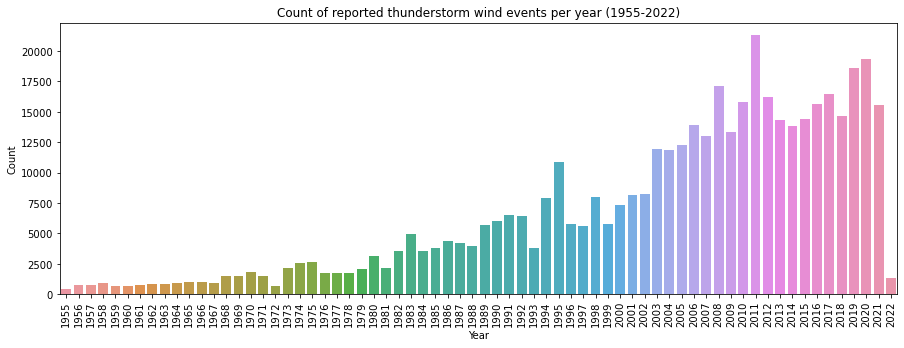

In [31]:
# Count of reported thunderstorm wind events per year (1955-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = thunderstorm_wind, x = 'year')
plt.title('Count of reported thunderstorm wind events per year (1955-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [32]:
# Thunderstorm wind events by year value counts

thunderstorm_wind['year'].value_counts()

2011    21282
2020    19314
2019    18620
2008    17161
2017    16472
        ...  
1956      735
1960      719
1972      712
1959      652
1955      421
Name: year, Length: 68, dtype: int64

Thunderstorm wind events have steadily increased over time. In the early years of this data, there were less than 1000 events per year, and in recent years, there have consistently been 15,000+ events per year. There are spikes observed in some years (1995, 2008, 2011, 2019 and 2020), but there's been a consistent upward trend for the most part.

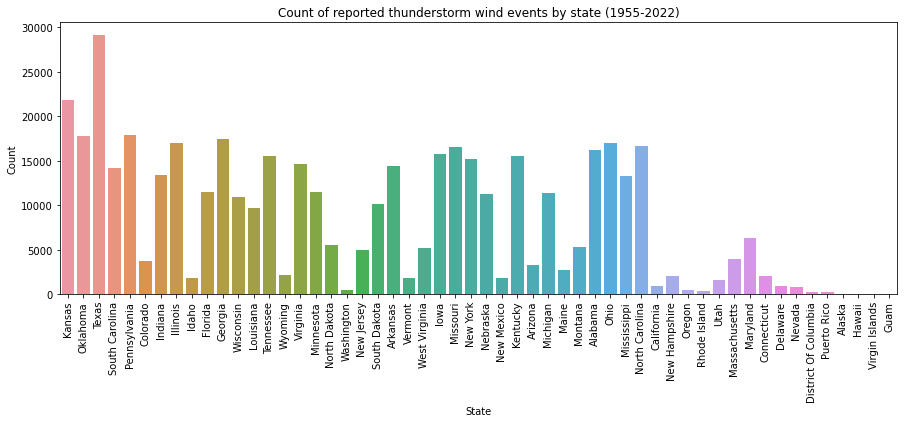

In [33]:
# Count of reported thunderstorm wind events by state (1955-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = thunderstorm_wind, x = 'state')
plt.title('Count of reported thunderstorm wind events by state (1955-2022)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90);

Similar to the previous *'Count of reported events by state'* plot, the count of thunderstorm wind events vary greatly by state. Texas has the highest count with nearly 30,000, followed by Kansas with a little more than 20,000. About half of the rest of the states fall in the 10,000-20,000 range and the other half fall mostly under the 5,000 range.

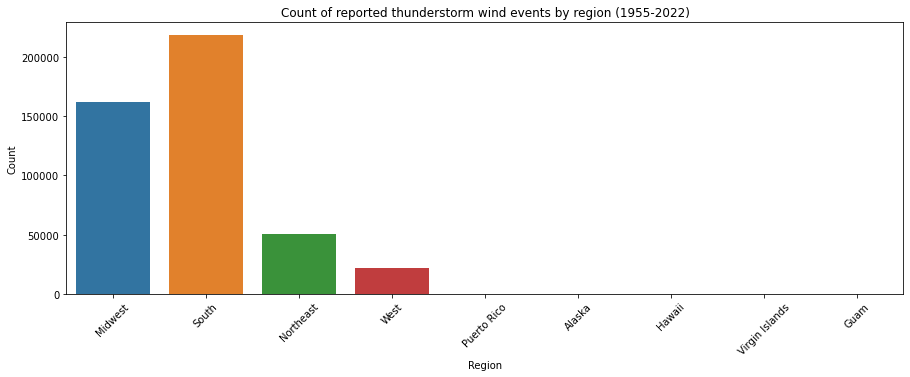

In [34]:
# Count of reported thunderstorm wind events by region (1955-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = thunderstorm_wind, x = 'region')
plt.title('Count of reported thunderstorm wind events by region (1955-2022)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45);

At the regional level, the South has the highest event count with over 200,000 events recorded and accounts for nearly half of all thunderstorm wind events. The Midwest comes in second with over 150,000, followed by the Northeast with around 50,000 and lastly the West with about 25,000.

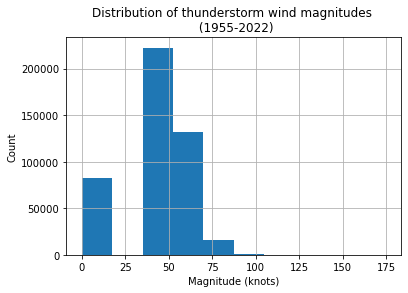

In [35]:
# Distribution of thunderstorm wind event magnitudes (1955-2022)

thunderstorm_wind['magnitude'].hist()
plt.title('Distribution of thunderstorm wind magnitudes \n (1955-2022)')
plt.xlabel('Magnitude (knots)')
plt.ylabel('Count');

The magnitude for thunderstorm wind is measured in knots. The distribution of magnitudes for this event ranges between 0 and 175 knots and is extremely right-skewed. 

Most events fall in the 35-50 range with over 200,000 events, followed by the 50-70 range with about 130,000, then, the 0-15 range with around 80,000, and then, lastly the 70-85 range with about 20,000. Anything beyond an 85 can likely be considered an outlier.

In [36]:
# Casting the year column as ints

# thunderstorm_wind['year'] = thunderstorm_wind['year'].astype(int)

In [37]:
# Thunderstorm wind magnitude averages (1955-2022)

thunderstorm_wind.groupby('year')['magnitude'].mean()

year
1955    18.527316
1956    21.164626
1957    18.883871
1958    18.194661
1959    16.420245
          ...    
2018    53.642544
2019    53.460795
2020    53.656674
2021    53.565948
2022    52.564822
Name: magnitude, Length: 68, dtype: float64

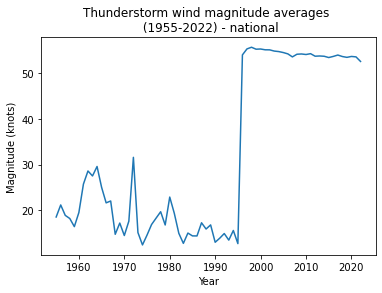

In [38]:
# Thunderstorm wind magnitude averages (1955-2022) - national

thunderstorm_wind.groupby('year')['magnitude'].mean().plot()
plt.title('Thunderstorm wind magnitude averages \n (1955-2022) - national')
plt.xlabel('Year')
plt.ylabel('Magnitude (knots)');

The thunderstorm wind magnitude averages by year are not what I expected. The data is very chaotic with the averages fluctuating wildly between 0 and 30 knots from 1955 to the mid-90s. Then, we see a dramatic spike from one year to the next where we see the average surpass 50. From there, the averages become steadier but seem to have a slight downward trend.

The spike in the mid-90s aligns with the previous knowledge that the database moved online in 1996 and that the number of events dramatically increased due to advances in technology and population density in previously sparse areas.

With the knowledge that conditions vary greatly in different parts of the country, I'll need to take a look at each region individually as that might help explain some of the chaos.

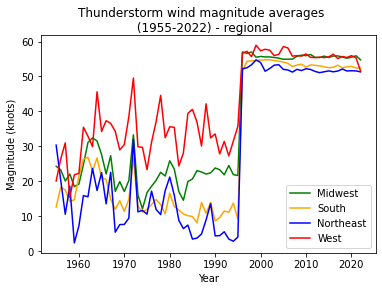

In [39]:
# Thunderstorm wind magnitude averages (1955-2022) - regional

fig, ax = plt.subplots()
ax.plot(thunderstorm_wind[thunderstorm_wind['region']=='Midwest'].groupby('year')['magnitude'].mean(), color='g', label='Midwest')
ax.plot(thunderstorm_wind[thunderstorm_wind['region']=='South'].groupby('year')['magnitude'].mean(), color='orange', label='South')
ax.plot(thunderstorm_wind[thunderstorm_wind['region']=='Northeast'].groupby('year')['magnitude'].mean(), color='b', label='Northeast')
ax.plot(thunderstorm_wind[thunderstorm_wind['region']=='West'].groupby('year')['magnitude'].mean(), color='r', label='West')

ax.set_xlabel('Year')
ax.set_ylabel('Magnitude (knots)')

fig.suptitle('Thunderstorm wind magnitude averages \n (1955-2022) - regional')
ax.legend();

Breaking down the averages by region does help a little, but the same level of chaos remains prior to the spike in the mid-90s. Because that data could be harmful to the time series model, I'm going to focus on data after 1995 and see if that data can be worked with on its own.

In [40]:
# Subsetting to thunderstorm wind events after 1996

thunderstorm_wind_1996 = thunderstorm_wind[thunderstorm_wind['year'] > 1996]

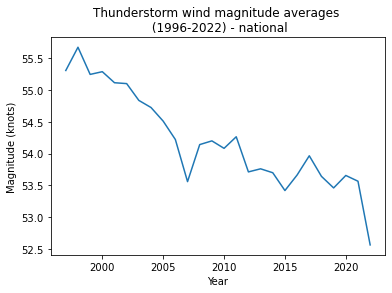

In [41]:
# Thunderstorm wind magnitude averages (1995-2022) - national

thunderstorm_wind_1996.groupby('year')['magnitude'].mean().plot()
plt.title('Thunderstorm wind magnitude averages \n (1996-2022) - national')
plt.xlabel('Year')
plt.ylabel('Magnitude (knots)');

Now that I'm only looking at data after 1995, I've zoomed back out to the national level. There's no more chaos but the downward trend initially detected in the *'Thunderstorm wind magnitude averages (1955-2022) - national'* plot is more evident. I'll see if breaking down by region gives a different perspective.

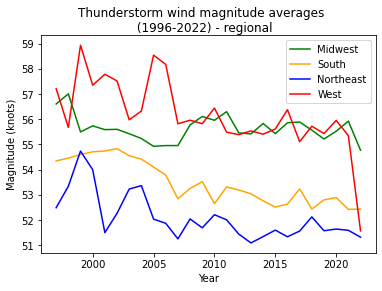

In [42]:
# Thunderstorm wind magnitude averages (1996-2022) - regional

fig, ax = plt.subplots()
ax.plot(thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='Midwest'].groupby('year')['magnitude'].mean(), color='g', label='Midwest')
ax.plot(thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='South'].groupby('year')['magnitude'].mean(), color='orange', label='South')
ax.plot(thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='Northeast'].groupby('year')['magnitude'].mean(), color='b', label='Northeast')
ax.plot(thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='West'].groupby('year')['magnitude'].mean(), color='r', label='West')

ax.set_xlabel('Year')
ax.set_ylabel('Magnitude (knots)')

fig.suptitle('Thunderstorm wind magnitude averages \n (1996-2022) - regional')
ax.legend();

Breaking down the averages by region definitely helps here. The South was likely the main cause of the downward trend at the national level given that it accounts for nearly half of all thunderstorm wind events and its own shape is similar to that of the national level shape.

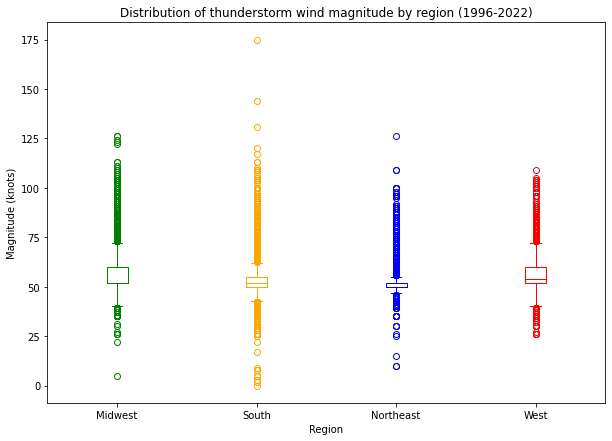

In [43]:
# Distribution of thunderstorm wind magnitude by region (1996-2022)

Midwest = thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='Midwest']['magnitude']
South = thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='South']['magnitude']
Northeast = thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='Northeast']['magnitude']
West = thunderstorm_wind_1996[thunderstorm_wind_1996['region']=='West']['magnitude']

fig, ax = plt.subplots(figsize=(10, 7))
dataset = [Midwest, South, Northeast, West]
labels = ['Midwest', 'South', 'Northeast', 'West']

colors = ['g', 'orange', 'b', 'r']
colors_midwest = dict(color=colors[0])
colors_south = dict(color=colors[1])
colors_northeast = dict(color=colors[2])
colors_west = dict(color=colors[3])

ax.boxplot(dataset[0], positions=[1], labels=[labels[0]], boxprops=colors_midwest, medianprops=colors_midwest, whiskerprops=colors_midwest, capprops=colors_midwest, flierprops=dict(markeredgecolor=colors[0]))
ax.boxplot(dataset[1], positions=[2], labels=[labels[1]], boxprops=colors_south, medianprops=colors_south, whiskerprops=colors_south, capprops=colors_south, flierprops=dict(markeredgecolor=colors[1]))
ax.boxplot(dataset[2], positions=[3], labels=[labels[2]], boxprops=colors_northeast, medianprops=colors_northeast, whiskerprops=colors_northeast, capprops=colors_northeast, flierprops=dict(markeredgecolor=colors[2]))
ax.boxplot(dataset[3], positions=[4], labels=[labels[3]], boxprops=colors_west, medianprops=colors_west, whiskerprops=colors_west, capprops=colors_west, flierprops=dict(markeredgecolor=colors[3]))

ax.set_xlabel('Region')
ax.set_ylabel('Magnitude (knots)')

ax.set_title('Distribution of thunderstorm wind magnitude by region (1996-2022)')
plt.show()

The distribution of thunderstorm wind magnitudes by region shows that there are a great number of outliers for each of the regions. The interquartile range (25th-75th percentile) for each of the regions is right above 50 knots. And while all regions have outliers, the Midwest and the South have outliers reaching as high as 175 knots.

In [44]:
# Subsetting to thunderstorm wind events with a magnitude greater than 0

thunderstorm_wind_gr_0 = thunderstorm_wind[thunderstorm_wind['magnitude'] > 0]
print(thunderstorm_wind_gr_0.shape[0])

371413


In [45]:
# Percent of events with a magnitude greater than 0 knots

371413 / 453604

0.8188045078967557

Out of the 453,604 events, nearly 20% have a magnitude of 0 knots. That's a substantial portion of the data, so I'd like to take a look and see what the data looks like without those events.

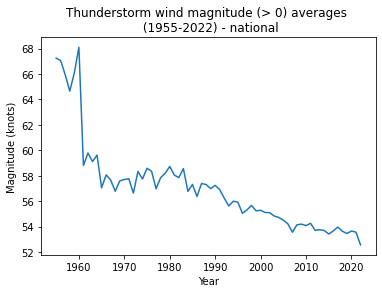

In [46]:
# Thunderstorm wind magnitude (> 0) averages (1955-2022) - national

thunderstorm_wind_gr_0.groupby('year')['magnitude'].mean().plot()
plt.title('Thunderstorm wind magnitude (> 0) averages \n (1955-2022) - national')
plt.xlabel('Year')
plt.ylabel('Magnitude (knots)');

I've plotted the thunderstorm wind magnitude averages going back to 1955, but this time without the 0 knot magnitude events. On the national level, it makes the plot less chaotic, and we don't see the spike in 1996 anymore. But it's interesting to see such a steady downward trend now.

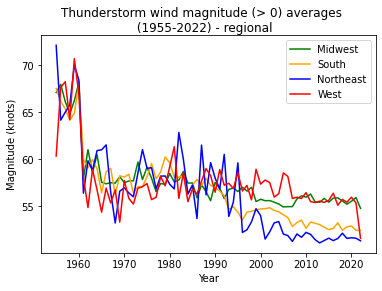

In [47]:
# Thunderstorm wind magnitude (> 0) averages (1955-2022) - regional

fig, ax = plt.subplots()
ax.plot(thunderstorm_wind_gr_0[thunderstorm_wind_gr_0['region']=='Midwest'].groupby('year')['magnitude'].mean(), color='g', label='Midwest')
ax.plot(thunderstorm_wind_gr_0[thunderstorm_wind_gr_0['region']=='South'].groupby('year')['magnitude'].mean(), color='orange', label='South')
ax.plot(thunderstorm_wind_gr_0[thunderstorm_wind_gr_0['region']=='Northeast'].groupby('year')['magnitude'].mean(), color='b', label='Northeast')
ax.plot(thunderstorm_wind_gr_0[thunderstorm_wind_gr_0['region']=='West'].groupby('year')['magnitude'].mean(), color='r', label='West')

ax.set_xlabel('Year')
ax.set_ylabel('Magnitude (knots)')

fig.suptitle('Thunderstorm wind magnitude (> 0) averages \n (1955-2022) - regional')
ax.legend();

Again, breaking it down by region helps in seeing what's really going on. The South and Northeast regions seem to both have downward trends, but it's likely the South that was driving the national downward trend given that it accounts for nearly half of all thunderstorm wind events.

#### **Thunderstorm Wind Summary**

The data for this event started off quite chaotic when analyzing at the national level and prior to 1996. Eliminating the events with 0 knot magnitudes helped resolve some of the chaos, but the downward that appeared as a result is interesting. 

If I were to choose this event to move forward with, I would not be able to use the events prior to 1996, as their trends are not representative of the most recent trends.

____

### 4.2. Tornado

In [48]:
# Subsetting to only tornado events

tornado = all_storms[all_storms['event_type'] == 'Tornado']
print(tornado.shape[0])

73987


In [49]:
# Dropping any missing values in the magnitude (target) column 

tornado = tornado.dropna(subset = ['magnitude'])
print(tornado.shape[0])

37635


In [50]:
# Tornado events by year value counts

tornado['year'].value_counts()

1992    1404
1990    1264
1995    1216
1991    1208
1973    1198
1982    1180
1974    1117
1984    1020
1983     995
1965     990
1980     972
1967     966
1971     963
1975     962
1994     947
1976     935
1957     930
1977     922
1989     921
1979     918
1978     875
1986     849
1981     830
1972     778
1988     773
1985     773
1961     772
1964     760
1968     715
1970     700
1987     695
1962     673
1969     650
1960     645
1955     632
1959     630
1993     616
1954     609
1958     608
1966     606
1956     567
1963     493
1953     492
1952     272
1951     269
1950     223
1998      36
1997      31
1996      10
2003       7
1999       6
2000       3
2006       3
2002       2
2004       2
2001       1
2005       1
Name: year, dtype: int64

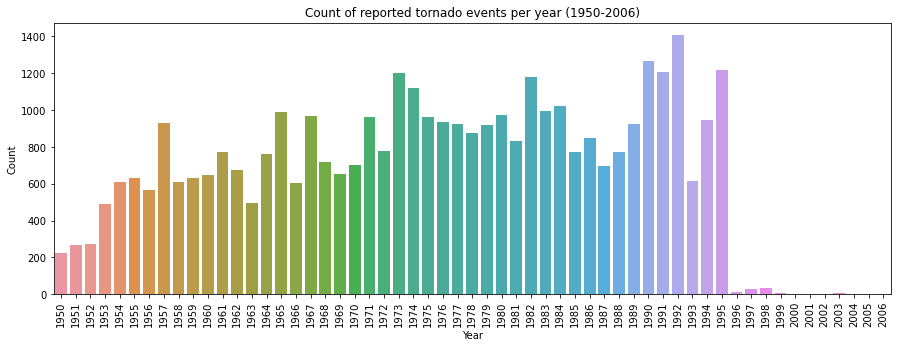

In [51]:
# Count of reported tornado events per year (1950-2006)

plt.figure(figsize=(15,5))
sns.countplot(data = tornado, x = 'year')
plt.title('Count of reported tornado events per year (1950-2006)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90);

In general, tornado events have increased over time, but it hasn't been steady. There's been a lot of fluctuation. What's interesting, though, is that the number of events drops suddenly from 1200 events in 1995 to hardly any at all in 1996. The numbers don't pick back up at any point after that and the events actually stop altogether in 2006.

#### **Tornado Summary**

The fact that the data for this event stops in 2006 is enough to disqualify it from moving forward. In order to forecast into the future, I need recent data, which this event is severely lacking.
___

### 4.3. Hail

In [52]:
# Subsetting to only tornado events

hail = all_storms[all_storms['event_type'] == 'Hail']
print(hail.shape[0])

382234


In [53]:
# Dropping the tornado event specific columns

hail = hail.drop(columns = ['tor_f_scale','tor_length','tor_width'])

In [54]:
# Dropping any missing values in the magnitude (target) column 

hail = hail.dropna(subset = ['magnitude'])
print(hail.shape[0])

382133


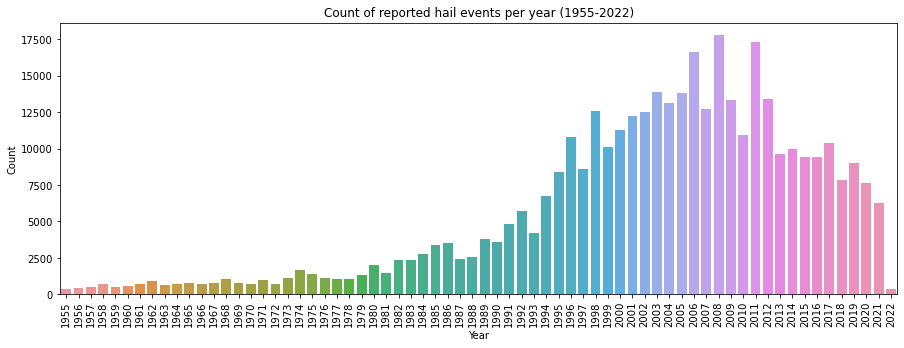

In [55]:
# Count of reported hail events per year (1955-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = hail, x = 'year')
plt.title('Count of reported hail events per year (1955-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [56]:
# Hail events by year value counts

hail['year'].value_counts()

2008    17768
2011    17331
2006    16656
2003    13915
2005    13808
        ...  
1959      531
1957      479
1956      401
1955      360
2022      351
Name: year, Length: 68, dtype: int64

Hail events are seen to have steadily increased over time until the 1990s. After that, they continue increasing until 2006 but at a more dramatic rate. From then on, there seems to be more of a downward trend, though, we do see some large spikes in 2008 and 2011 making them the years with the highest event counts within the entire hail dataset.

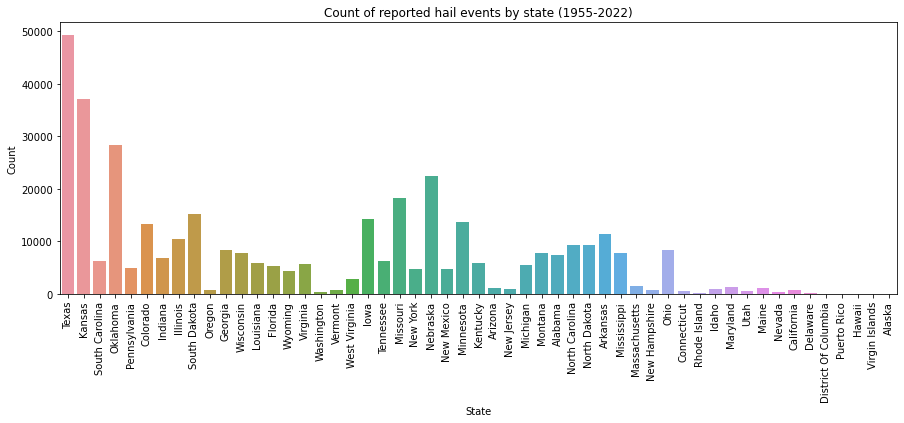

In [57]:
# Count of reported hail events by state (1955-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = hail, x = 'state')
plt.title('Count of reported hail events by state (1955-2022)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90);

The count of hail events vary greatly by state, even more so than in any of the previous events analyzed so far. Though, this makes sense as hail is heavily dependent on freezing weather and not all states are subject to those conditions as often as others. What's interesting though, is that Texas still has the highest event count. I'm aware that temperatures do drop below freezing point there, but I wouldn't have expected it to have the highest count being a Southern state. Clearly, the fact that it's second in population density and size, remains an important factor.

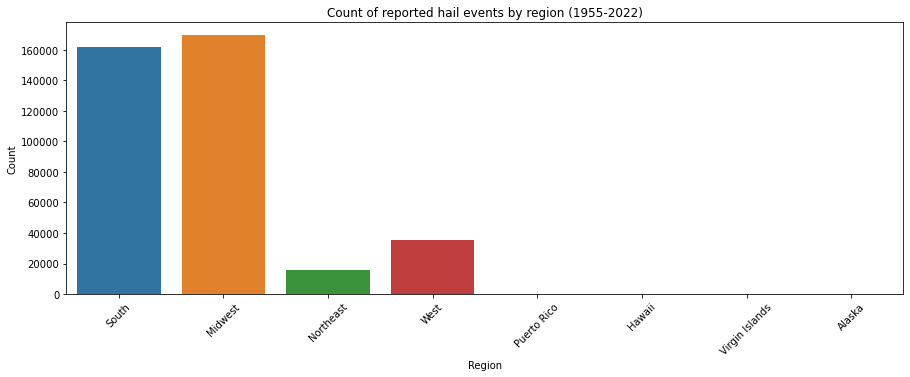

In [58]:
# Count of reported hail events by region (1955-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = hail, x = 'region')
plt.title('Count of reported hail events by region (1955-2022)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45);

At the regional level, the Midwest, for the first time in any of the events analyzed so far, suprasses the South's count of events, though it's not far behind. The Midwest totals to a little under 170,000 events and the South is right around 160,000. Next is the West with around 40,000 events and the Northeast lags further behind with around 20,000 events.

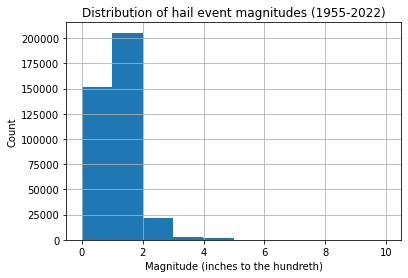

In [59]:
# Distribution of hail event magnitudes (1955-2022)

hail['magnitude'].hist()
plt.title('Distribution of hail event magnitudes (1955-2022)')
plt.xlabel('Magnitude (inches to the hundreth)')
plt.ylabel('Count');

The magnitude for hail is measured in inches to the hundreth. The distribution of magnitudes for this event ranges between 0 and 10 inches to the hundreth and is extremely right-skewed.

Most events fall in the 1-2 range with over 200,000 events, followed by the 0-1 range with over 150,000, and then, the 2-3 range with nearly 25,000. Anything beyond a 3 is likely considered an outlier.

In [60]:
# Hail magnitude averages by year 

hail.groupby('year')['magnitude'].mean()

year
1955    1.445833
1956    1.512120
1957    1.549937
1958    1.590297
1959    1.585687
          ...   
2018    1.215851
2019    1.228849
2020    1.256828
2021    1.269670
2022    1.105014
Name: magnitude, Length: 68, dtype: float64

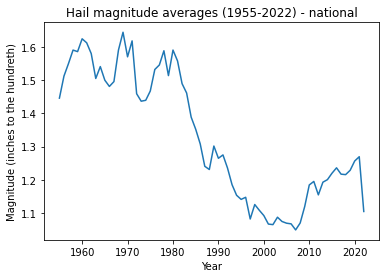

In [61]:
# Hail magnitude averages (1955-2022) - national

hail.groupby('year')['magnitude'].mean().plot()
plt.title('Hail magnitude averages (1955-2022) - national')
plt.xlabel('Year')
plt.ylabel('Magnitude (inches to the hundreth)');

The hail event magnitude averages start off high and fluctuate between 1.4 and 1.6 between 1955 and 1980. We start seeing a downward trend toward 1.0 for the next 28 years until 2008 when the averages begin to rise until they hit 1.27 in 2021. In 2022, we see a steep drop back to 1.1.

The downward trend between the 1980s and early 2000s make sense, given the steady increase in hail events during that time. As does the upward trend after 2008 when the number of events begin decreasing, as seen in the *'Count of reported hail events per year'* plot.

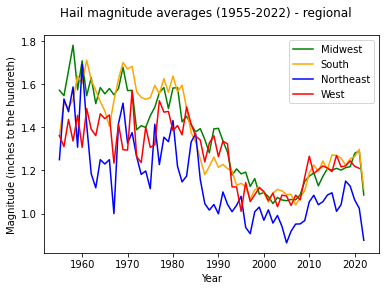

In [62]:
# Hail magnitude averages(1955-2022) - regional

fig, ax = plt.subplots()
ax.plot(hail[hail['region']=='Midwest'].groupby('year')['magnitude'].mean(), color='g', label='Midwest')
ax.plot(hail[hail['region']=='South'].groupby('year')['magnitude'].mean(), color='orange', label='South')
ax.plot(hail[hail['region']=='Northeast'].groupby('year')['magnitude'].mean(), color='b', label='Northeast')
ax.plot(hail[hail['region']=='West'].groupby('year')['magnitude'].mean(), color='r', label='West')

ax.set_xlabel('Year')
ax.set_ylabel('Magnitude (inches to the hundreth)')

fig.suptitle('Hail magnitude averages (1955-2022) - regional')
ax.legend();

Breaking down the averages by region doesn't do much to further explain the ups and downs over time. All regions show the same trend, though at different severities.

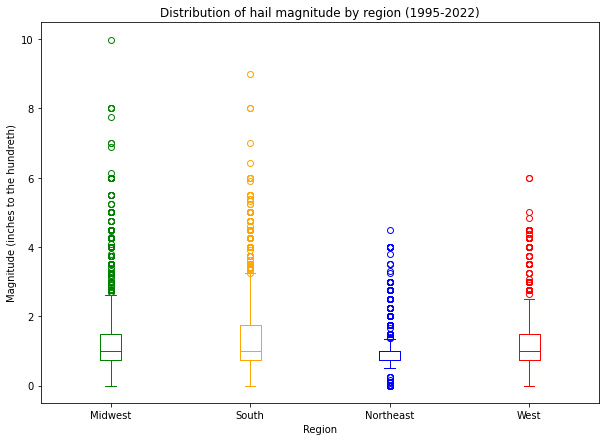

In [63]:
# Distribution of hail magnitude by region (1995-2022)

Midwest = hail[hail['region']=='Midwest']['magnitude']
South = hail[hail['region']=='South']['magnitude']
Northeast = hail[hail['region']=='Northeast']['magnitude']
West = hail[hail['region']=='West']['magnitude']

fig, ax = plt.subplots(figsize=(10, 7))
dataset = [Midwest, South, Northeast, West]
labels = ['Midwest', 'South', 'Northeast', 'West']

colors = ['g', 'orange', 'b', 'r']
colors_midwest = dict(color=colors[0])
colors_south = dict(color=colors[1])
colors_northeast = dict(color=colors[2])
colors_west = dict(color=colors[3])

ax.boxplot(dataset[0], positions=[1], labels=[labels[0]], boxprops=colors_midwest, medianprops=colors_midwest, whiskerprops=colors_midwest, capprops=colors_midwest, flierprops=dict(markeredgecolor=colors[0]))
ax.boxplot(dataset[1], positions=[2], labels=[labels[1]], boxprops=colors_south, medianprops=colors_south, whiskerprops=colors_south, capprops=colors_south, flierprops=dict(markeredgecolor=colors[1]))
ax.boxplot(dataset[2], positions=[3], labels=[labels[2]], boxprops=colors_northeast, medianprops=colors_northeast, whiskerprops=colors_northeast, capprops=colors_northeast, flierprops=dict(markeredgecolor=colors[2]))
ax.boxplot(dataset[3], positions=[4], labels=[labels[3]], boxprops=colors_west, medianprops=colors_west, whiskerprops=colors_west, capprops=colors_west, flierprops=dict(markeredgecolor=colors[3]))

ax.set_xlabel('Region')
ax.set_ylabel('Magnitude (inches to the hundreth)')

ax.set_title('Distribution of hail magnitude by region (1995-2022)')
plt.show()

The distribution of hail magnitudes by region shows that the interquartile range (25th-75th percentile) for each region is within the 0-2 range. The South interestingly has the largest IQR range, followed by the Midwest and the West, with comparable IQRs and the Northeast with the smallest IQR.

All regions have numerous outliers that extend beyond the maximum, but only the Northeast has outliers below the minimum. We can also see that the Midwest and the South are the regions to have experienced the most severe hail events.

In [64]:
# Subsetting to hail events with a magnitude greater than 0

hail_gr_0 = hail[hail['magnitude'] > 0]
print(hail_gr_0.shape[0])

381781


In [65]:
# Percent of events with a magnitude greater than 0 inches to the hundreth

381781 / 382133

0.9990788547442906

Out of the 382,234 hail events, less than 1% of them have a magnitude of 0 inches to the hundreth. Unlike with the thunderstorm wind event where 20% of the events had magnitudes of 0 knots, there's no need to see what the data will look like without the 0 magnitudes here since it's too small of a percentage to make a difference.

#### **Hail Summary**

The data for this event seems promising. It's not as chaotic as the thunderstorm wind event data, but I'd have to stick to data after the year 2000 since the trends before then are not at all representative of the more recent trends. This would give me even less data to work with in comparison to the thunderstorm wind event.

---

### 4.4. High Wind

In [66]:
# Subsetting to only high wind events

high_wind = all_storms[all_storms['event_type'] == 'High Wind']
print(high_wind.shape[0])

79894


In [67]:
# Dropping the tornado event specific columns

high_wind = high_wind.drop(columns = ['tor_f_scale','tor_length','tor_width'])

In [68]:
# Dropping any missing values in the magnitude (target) column 

high_wind = high_wind.dropna(subset = ['magnitude'])
print(high_wind.shape[0])

74834


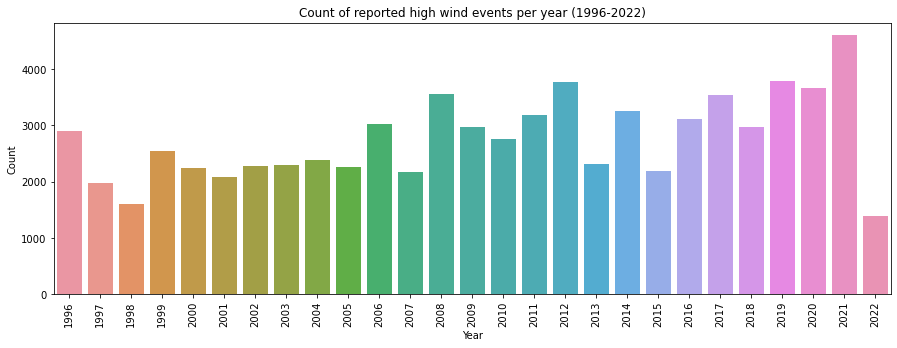

In [69]:
# Count of reported hail events per year (1996-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = high_wind, x = 'year')
plt.title('Count of reported high wind events per year (1996-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [70]:
# High wind events by year value counts

high_wind['year'].value_counts()

2021    4597
2019    3787
2012    3765
2020    3669
2008    3565
2017    3536
2014    3253
2011    3191
2016    3120
2006    3026
2018    2973
2009    2968
1996    2905
2010    2753
1999    2543
2004    2385
2013    2307
2003    2305
2002    2285
2005    2255
2000    2246
2015    2192
2007    2168
2001    2086
1997    1970
1998    1597
2022    1387
Name: year, dtype: int64

The earliest records of high wind events are in 1996. There's heavy fluctuation and there isn't as much of a clear trend as there has been for the previous events, but we can see that there has been a general increase in events when comparing the number of events in recent years to those in the early years of this event.

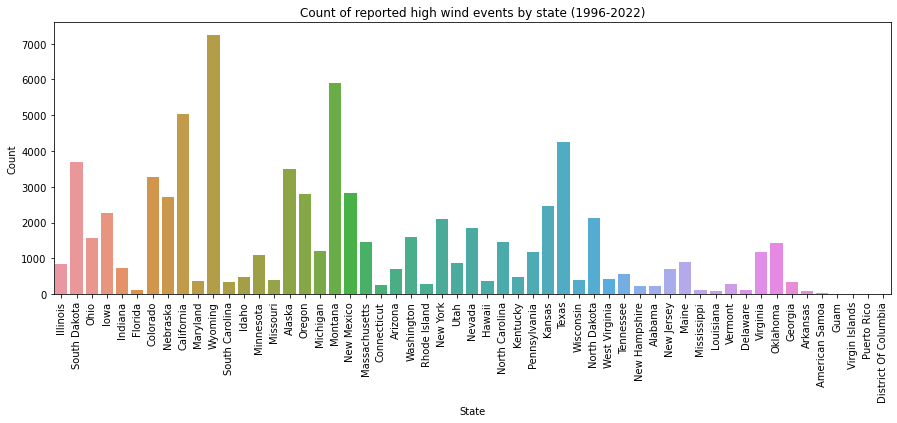

In [71]:
# Count of reported high wind events by state (1996-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = high_wind, x = 'state')
plt.title('Count of reported high wind events by state (1996-2022)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90);

Surprisingly, for the first time, we see that Texas is not the state with the most event counts. It's actually Wyoming with over 7,000 events. It's followed by Montana with about 6,000, then California with about 5,000, and then comes Texas with around 4,000. The rest of the states vary wildly between 0 and 4,000.

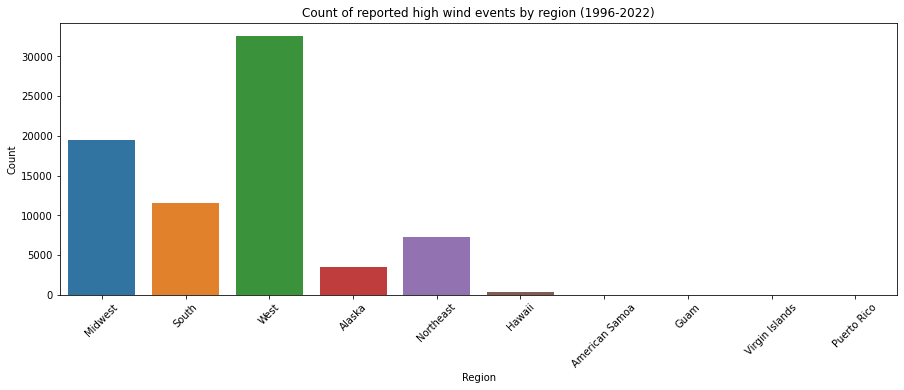

In [72]:
# Count of reported high wind events by region (1996-2022)

plt.figure(figsize=(15,5))
sns.countplot(data = high_wind, x = 'region')
plt.title('Count of reported high wind events by region (1996-2022)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45);

And yet another first. It's not the South with the highest event count, but the West with over 30,000 events. Its followed by the Midwest with just under 200,000, then the South with around 10,000, and then the Northeast with around 7,500.

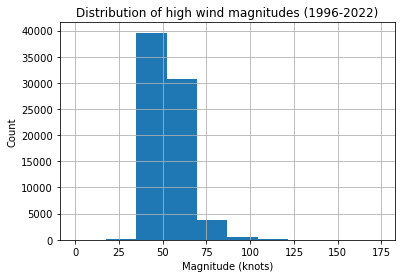

In [73]:
# Distribution of high wind magnitudes (1996-2022)

high_wind['magnitude'].hist()
plt.title('Distribution of high wind magnitudes (1996-2022)')
plt.xlabel('Magnitude (knots)')
plt.ylabel('Count');

The magnitude for high wind is measured in knots. The distribution of magnitudes for this event ranges between 0 and 175 knots and is right-skewed. 

Most events fall in the 35-50 range with nearly 40,000 events, followed by the 50-70 range with just over 30,000, and then the 70-85 range with just under 5,000. Anything beyond an 85 can likely be considered an outlier.

This distribution is actually very similar to the thunderstorm wind distribution, except there are hardly any events under the 25 range, whereas the thunderstorm wind distribution had a decent amount.

In [74]:
# High wind magnitude averages by year

high_wind.groupby('year')['magnitude'].mean()

year
1996    54.351807
1997    53.417259
1998    53.870382
1999    54.819505
2000    55.415850
2001    52.975551
2002    55.193392
2003    53.771007
2004    51.889983
2005    52.515716
2006    54.277264
2007    54.055812
2008    52.791024
2009    52.985175
2010    52.535053
2011    52.955500
2012    53.136521
2013    51.757261
2014    51.003074
2015    52.673358
2016    51.390705
2017    52.164310
2018    52.792466
2019    53.536837
2020    54.625238
2021    56.165543
2022    54.935112
Name: magnitude, dtype: float64

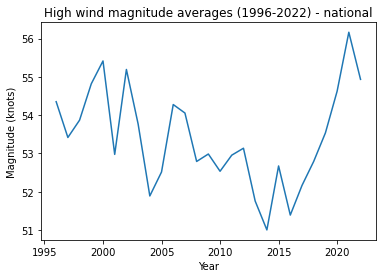

In [75]:
# High wind magnitude averages (1996-2022) - national

high_wind.groupby('year')['magnitude'].mean().plot()
plt.title('High wind magnitude averages (1996-2022) - national')
plt.xlabel('Year')
plt.ylabel('Magnitude (knots)');

Between 1995 and 2015, the high wind magnitudes show a downward trend while fluctuating between 51 and 55.5 knots. In 2016, we see the beginning of a steep increase up until 2021 when it surpasses an unprecedented 56 knots. In 2022, however, we see the beginning of a decline back toward 55 knots.

The fluctuations here are interesting seeing as there are no major fluctuations in yearly event counts as there have with previous events. Any steep downward or upward trends were explained by large increases or decreases in event counts then, so I'm curious to see what's driving this.

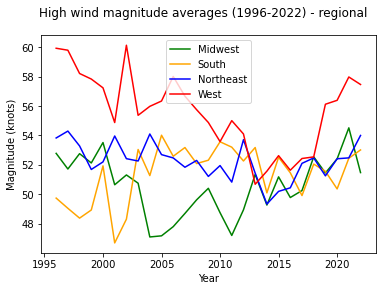

In [76]:
# High wind magnitude averages (1996-2022) - regional

fig, ax = plt.subplots()
ax.plot(high_wind[high_wind['region']=='Midwest'].groupby('year')['magnitude'].mean(), color='g', label='Midwest')
ax.plot(high_wind[high_wind['region']=='South'].groupby('year')['magnitude'].mean(), color='orange', label='South')
ax.plot(high_wind[high_wind['region']=='Northeast'].groupby('year')['magnitude'].mean(), color='b', label='Northeast')
ax.plot(high_wind[high_wind['region']=='West'].groupby('year')['magnitude'].mean(), color='r', label='West')

ax.set_xlabel('Year')
ax.set_ylabel('Magnitude (knots)')

fig.suptitle('High wind magnitude averages (1996-2022) - regional')
ax.legend();

Breaking down the averages by region helps explain the sudden national increase in high wind magnitude averages. While there was a slight increase between 2015 and 2022 for the Midwest, South and Northeast region, it's the West region that was driving the steep increase. This makes sense seeing as the West accounts for more than 1/3 of the events and it's the region to experience the highest magnitudes.

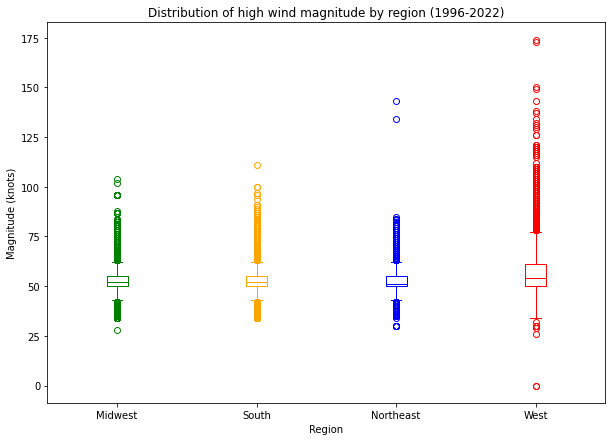

In [77]:
# Distribution of high wind magnitude by region (1996-2022)

Midwest = high_wind[high_wind['region']=='Midwest']['magnitude']
South = high_wind[high_wind['region']=='South']['magnitude']
Northeast = high_wind[high_wind['region']=='Northeast']['magnitude']
West = high_wind[high_wind['region']=='West']['magnitude']

fig, ax = plt.subplots(figsize=(10, 7))
dataset = [Midwest, South, Northeast, West]
labels = ['Midwest', 'South', 'Northeast', 'West']

colors = ['g', 'orange', 'b', 'r']
colors_midwest = dict(color=colors[0])
colors_south = dict(color=colors[1])
colors_northeast = dict(color=colors[2])
colors_west = dict(color=colors[3])

ax.boxplot(dataset[0], positions=[1], labels=[labels[0]], boxprops=colors_midwest, medianprops=colors_midwest, whiskerprops=colors_midwest, capprops=colors_midwest, flierprops=dict(markeredgecolor=colors[0]))
ax.boxplot(dataset[1], positions=[2], labels=[labels[1]], boxprops=colors_south, medianprops=colors_south, whiskerprops=colors_south, capprops=colors_south, flierprops=dict(markeredgecolor=colors[1]))
ax.boxplot(dataset[2], positions=[3], labels=[labels[2]], boxprops=colors_northeast, medianprops=colors_northeast, whiskerprops=colors_northeast, capprops=colors_northeast, flierprops=dict(markeredgecolor=colors[2]))
ax.boxplot(dataset[3], positions=[4], labels=[labels[3]], boxprops=colors_west, medianprops=colors_west, whiskerprops=colors_west, capprops=colors_west, flierprops=dict(markeredgecolor=colors[3]))

ax.set_xlabel('Region')
ax.set_ylabel('Magnitude (knots)')

ax.set_title('Distribution of high wind magnitude by region (1996-2022)')
plt.show()

The distribution of high wind magnitudes by region shows that the interquartile range (25th-75th percentile) for each region is right around 50 knots. The West has the largest IQR, and the rest of the regions share smaller, more comparable IQRs. All regions have numerous outliers that extend beyond both the minimums and the maximums, but the West has the largest outliers reaching as many as 175 knots.

In [78]:
# Subsetting to high wind events with a magnitude greater than 0

high_wind_gr_0 = high_wind[high_wind['magnitude'] > 0]
print(high_wind_gr_0.shape[0])

74832


In [79]:
# Percent of events with a magnitude greater than 0 knots
74832 / 74834

0.9999732741801854

Out of the 79,894 high wind events, less than 1% of them have a magnitude of 0 knots, so there's no need to see what the data will look like without those magnitudes since it's too small of a percentage to make a difference.

#### **High Wind Summary**

The data for this event does not seem as promising as the data for the thunderstorm wind and hail events. I knew from the start that it had substantially less observations than the thunderstorm wind, tornado and hail events, but decided to give it a chance considering I'd be modeling on averaged data. However, the data did not show any long-term consistent trends, which would not make it ideal data to forecast on.

---
## 4. EDA Summary

To recap, I explored 4 storm events: thunderstorm wind, tornado, hail and high wind. I narrowed it down to these events by focusing on the following:
1. Events for which magnitude is tracked
2. Event with the highest event counts
3. Events with the highest casualties

As I explored these 4 events, I found that the tornado and high wind events would not make for good data to run a time series model on. The tornado event did not have any data beyond 2006 and the high wind event had far too few observations that did not allow for any decent trends. That narrowed it down to thunderstorm wind and hail, which I decided to move forward with.

I'll be working with this data on the quarterly level instead of the annual level, for the purpose of increasing the amount of observations, since for thunderstorm wind, I'll be working with 26 years of data, and for hail, I'll be working with 22 years of data.

I'd also like to note that, although outliers are usually areas for concern and should be dealt with, I will not be removing them. They do not seem to be due to error and removing them would just suppress the naturally high variability of the data. It would reduce my error metrics and make my predictions look more accurate, but that doesn't necessarily mean they'll be more accurate when applied to the real world.